In [4]:
import numpy as np
import datetime
import time
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
%config InlineBackend.figure_format='retina'
sns.set() # Revert to matplotlib defaults
plt.rcParams['figure.figsize'] = (8, 8)
plt.rcParams['axes.labelpad'] = 10
sns.set_style("darkgrid")

In [5]:
%load_ext watermark
%watermark -d -v -m -p requests,numpy,pandas,matplotlib,seaborn,sklearn

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
2020-08-14 

CPython 3.7.6
IPython 7.12.0

requests 2.22.0
numpy 1.18.1
pandas 1.0.1
matplotlib 3.1.3
seaborn 0.10.0
sklearn 0.22.1

compiler   : Clang 4.0.1 (tags/RELEASE_401/final)
system     : Darwin
release    : 19.6.0
machine    : x86_64
processor  : i386
CPU cores  : 4
interpreter: 64bit


In [7]:
df = pd.read_csv('data/hr-analytics/hr_data_processed.csv')

In [8]:
df[["number_project","average_montly_hours"]].describe()

,number_project,average_montly_hours
count,14999.000000,14999.000000
mean,3.803054,200.992489
std,1.232592,49.492423
min,2.000000,96.000000
25%,3.000000,156.000000
50%,4.000000,200.000000
75%,5.000000,244.000000
max,7.000000,310.000000


Comparing the mean, min, and max of each, notice how number_project is limited to the range 2-7, whereas average_montly_hours ranges from 96-310.

In [9]:
#split the features into training and testing
from sklearn.model_selection import train_test_split
features =["number_project", "average_montly_hours"]
X_train,X_test,y_train,y_test = train_test_split(
        df[features].values,
        df["left"].values,
        test_size = 0.3,
        random_state =1,
)

In [10]:
#Scale the data
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled =scaler.transform(X_test)

When training model, we used MinMaxScaler library scales each feature to be in a range of 0 to 1. We can observe this by running the following code 


In [13]:
(
    X_train_scaled.flatten().mean(),
    X_train_scaled.flatten().min(),
    X_train_scaled.flatten().max()
)

(0.4231614367047082, 0.0, 1.0)

In [14]:
#Train an SVM with the rbf kernel
from sklearn.svm import SVC
svm = SVC(kernel ="rbf", C=1, random_state =1, gamma="scale")
svm.fit(X_train_scaled,y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [15]:
#Calculate the accuracy
from sklearn.metrics import accuracy_score
y_pred = svm.predict(X_test_scaled)
accuracy_score(y_test,y_pred)*100

88.84444444444445

In [17]:
#Calculate class accuracies 
from sklearn.metrics import confusion_matrix
cmat = confusion_matrix(y_test,y_pred)
cmat.diagonal()/cmat.sum(axis=1)*100

array([95.98946136, 66.32841328])

We can see the accuracy of 
~96% for class 0 and ~66% for class 1

(-0.2, 1.2)

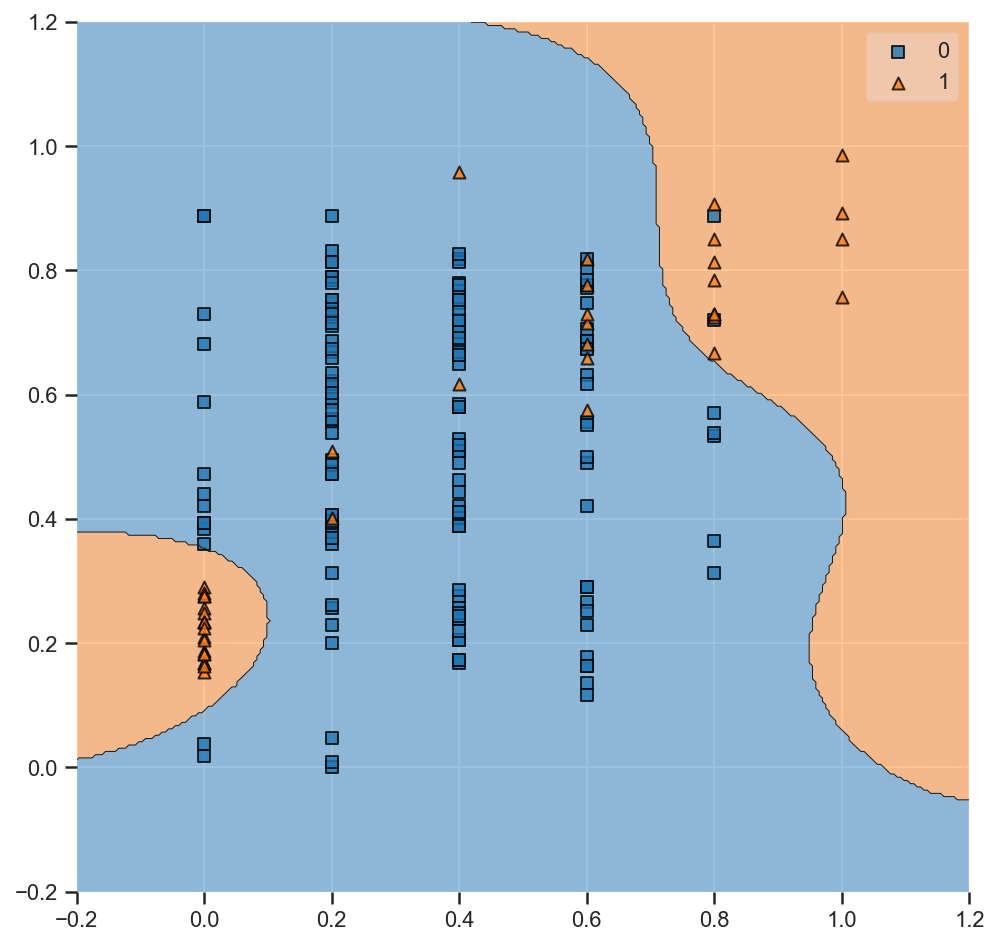

In [19]:
#Plot the decision regions
from mlxtend.plotting import plot_decision_regions
N_samples = 200
X,y = X_train_scaled[:N_samples],y_train[:N_samples]
plot_decision_regions(X,y,clf=svm)
plt.xlim(-0.2,1.2)
plt.ylim(-0.2,1.2)


(-0.2, 1.2)

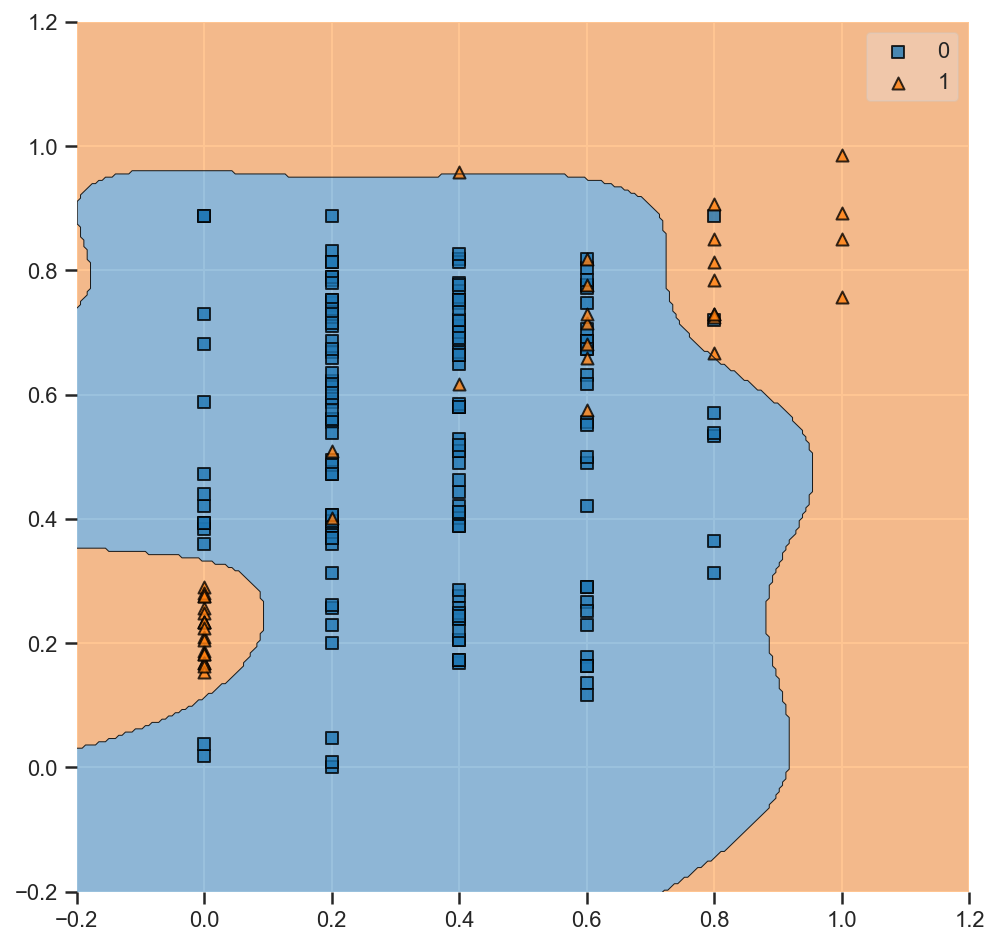

In [20]:
#Train an SVM with c = 50
svm =SVC (kernel="rbf", C=50, random_state=1, gamma="scale")
svm.fit(X_train_scaled,y_train)
X,y = X_train_scaled[:N_samples],y_train[:N_samples]
plot_decision_regions(X,y,clf=svm)
plt.xlim(-0.2,1.2)
plt.ylim(-0.2,1.2)

Based on these two comparison, we can see that c= 50 SVM attempts to fit the patterns in the training data more closely. THis is notable wiht respect to the pointx,y =(0.4,1) as denoted by the orange triangle. 